<a href="https://www.kaggle.com/code/anjusukumaran4/crab-age-dataset-eda-prediction-4-models?scriptVersionId=138043845" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Crab Age Prediction using Crab Age Dataset with Four Different Models 

Importing libraries

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e16/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e16/test.csv')

In [3]:
print('Shape of train data : ',train_df.shape)
print("Shape of test data : ",test_df.shape)

Shape of train data :  (74051, 10)
Shape of test data :  (49368, 9)


## Train Data Exploration

In [4]:
train_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [5]:
train_df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


Checking for null values

In [7]:
train_df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

No null values in train dataset

In [8]:
#checking unique values in sex column
train_df['Sex'].unique()

array(['I', 'M', 'F'], dtype=object)

M : Male , 
F : Female , 
I : Indeterminate

In [9]:
#taking count for unique values
count_bysex=train_df['Sex'].value_counts().to_frame(name='Count').sort_values(by=['Count'])
count_bysex

,Count
F,23010
I,23957
M,27084


<Axes: ylabel='Count'>

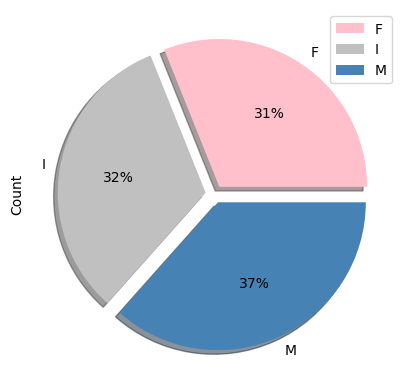

In [10]:
#plotting
colors = ['pink', 'silver', 'steelblue']
explode = (0.06, 0.06, 0.06)
count_bysex.plot(kind='pie',y='Count',colors=colors,explode=explode,autopct='%1.0f%%',shadow=True)

<Figure size 1200x1000 with 0 Axes>

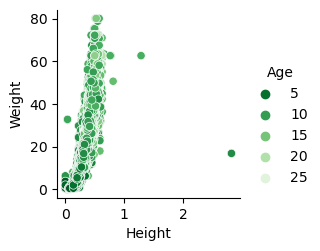

In [11]:
#showing how the variables are scatterd
plt.figure(figsize=(12,10))
sns.pairplot(train_df,x_vars=['Height'],y_vars=['Weight'],hue='Age',kind='scatter',palette='Greens_r')

<Figure size 1200x1000 with 0 Axes>

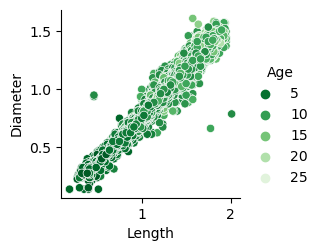

In [12]:
plt.figure(figsize=(12,10))
sns.pairplot(train_df,x_vars=['Length'],y_vars=['Diameter'],hue='Age',kind='scatter',palette='Greens_r')

#### Correlation heat Map

<Axes: >

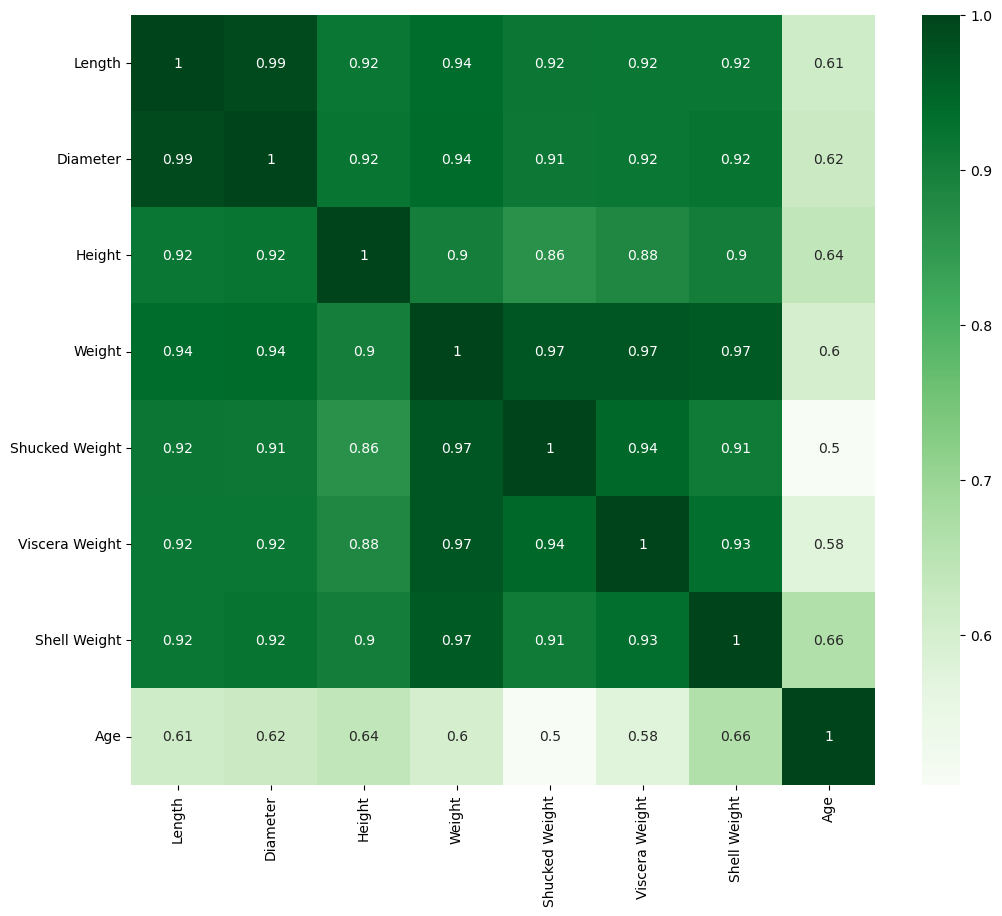

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(train_df.drop(['id'],axis=1).corr(),annot=True,cmap='Greens')

## Finding Outliers

Checking for outliers in different columns

<Axes: >

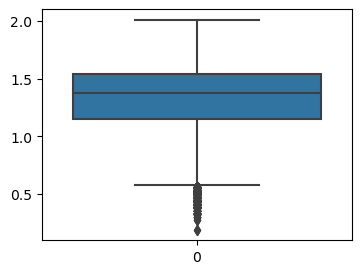

In [14]:
plt.figure(figsize=(4,3))
sns.boxplot(train_df['Length'])

<Axes: >

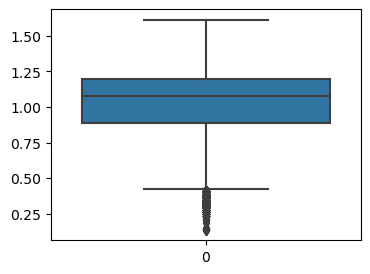

In [15]:
plt.figure(figsize=(4,3))
sns.boxplot(train_df['Diameter'])

<Axes: >

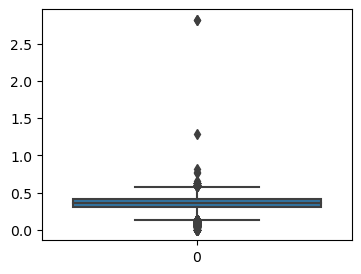

In [16]:
plt.figure(figsize=(4,3))
sns.boxplot(train_df['Height'])

<Axes: >

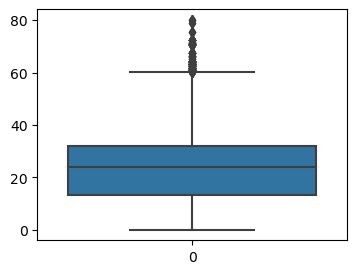

In [17]:
plt.figure(figsize=(4,3))
sns.boxplot(train_df['Weight'])

<Axes: >

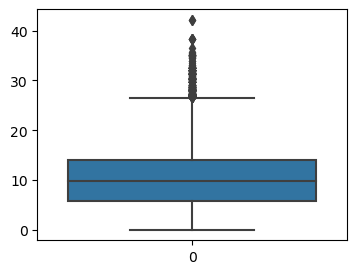

In [18]:
plt.figure(figsize=(4,3))
sns.boxplot(train_df['Shucked Weight'])

<Axes: >

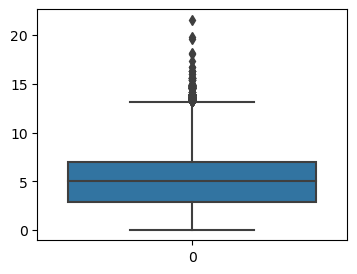

In [19]:
plt.figure(figsize=(4,3))
sns.boxplot(train_df['Viscera Weight'])

<Axes: >

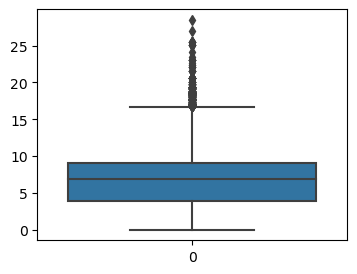

In [20]:
plt.figure(figsize=(4,3))
sns.boxplot(train_df['Shell Weight'])

We can see that there are few outliers present in the dataset

## Removing Outliers

In [21]:
train_df=train_df.drop(train_df[train_df['Length']<0.35].index)
train_df=train_df.drop(train_df[train_df['Diameter']<0.2].index)
train_df=train_df.drop(train_df[train_df['Height']>1.2].index)
train_df=train_df.drop(train_df[train_df['Weight']>70].index)
train_df=train_df.drop(train_df[train_df['Shucked Weight']>40].index)
train_df=train_df.drop(train_df[train_df['Viscera Weight']>18].index)
train_df=train_df.drop(train_df[train_df['Shell Weight']>25].index)

In [22]:
print("Shape of train dataset after removing outliers : ",train_df.shape)

Shape of train dataset after removing outliers :  (73948, 10)


In [23]:
#mapping categorical values to numerical values
train_df['Sex']=train_df['Sex'].map({'M':0,'F':1,'I':2})

In [24]:
#final df
train_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,2,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,2,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,0,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,1,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,2,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


## Data Preprocessing

In [25]:
X=train_df.drop('Age',axis=1)
y=train_df[['Age']]

In [26]:
#splitting data
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
print(f'X_train',X_train.shape)
print(f'y_train',y_train.shape)
print(f'X_val',X_val.shape)
print(f'y_val',y_val.shape)

X_train (59158, 9)
y_train (59158, 1)
X_val (14790, 9)
y_val (14790, 1)


## Model Building

## 1. RandomForestRegressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=0)

#fit the model
rfr.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

### Prediction and mae

In [29]:
pred1=rfr.predict(X_val)

from sklearn.metrics import mean_absolute_error
mae1  = mean_absolute_error(y_val, pred1)
print('Mean Absolute Error : ',round(mae1,5))

Mean Absolute Error :  1.46787


Mean Absolute Error (MAE) is the absolute error refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

## 2. XGBRegressor

In [30]:
from xgboost import XGBRegressor

xgb=XGBRegressor(n_estimators=1000,learning_rate=0.01,random_state=42)

#fit the model
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

#### Prediction and mae

In [31]:
pred2=xgb.predict(X_val)

mae2=mean_absolute_error(pred2,y_val)
print('Mean Absolute Error : ',round(mae2,5))

Mean Absolute Error :  1.40453


## 3. CatBoost

In [32]:
from catboost import CatBoostRegressor

cbr=CatBoostRegressor(learning_rate=0.05,verbose=False,random_state=0)
cbr.fit(X_train,y_train)

#### Prediction and mae

In [33]:
pred3=cbr.predict(X_val)

mae3=mean_absolute_error(pred3,y_val)
print('Mean Absolute Error : ',round(mae3,5))

Mean Absolute Error :  1.40428


## 4. Decision Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor(random_state=42)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

### Prediction and mae

In [35]:
pred4=dtr.predict(X_val)

mae4=mean_absolute_error(pred4,y_val)
print('Mean Absolute Error : ',round(mae4,5))

Mean Absolute Error :  2.01346


### Comparing Models

In [36]:
models=['RandomForestRegressor','XGBRegressor','CatBoost','Decision Tree']
mae=[mae1,mae2,mae3,mae4]
data={'Models':['RandomForestRegressor','XGBRegressor','CatBoost','Decision Tree'],'MAE':[mae1,mae2,mae3,mae4]}
pd.DataFrame(data).style.background_gradient(cmap='Blues_r')

,Models,MAE
0,RandomForestRegressor,1.467869
1,XGBRegressor,1.404533
2,CatBoost,1.404281
3,Decision Tree,2.013455


<Axes: title={'center': 'Comparing Models'}, xlabel='MAE'>

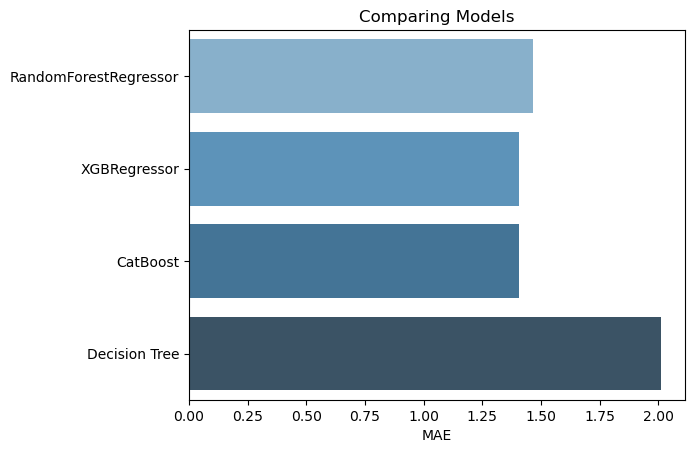

In [37]:
#plotting
plt.title('Comparing Models')
plt.xlabel('MAE')
sns.barplot(x=mae,y=models,palette='Blues_d')

### Test Dataset exploration

In [38]:
test_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [39]:
test_df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],
      dtype='object')

In [40]:
#checking for null values
test_df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64

No null values

In [41]:
#mapping categorical values to numerical values
test_df['Sex']=test_df['Sex'].map({'M':0,'F':1,'I':2})

In [42]:
#final df
test_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,2,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,2,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,1,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,1,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,2,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


## Submission

In [43]:
#hyperparameter tuning in xgb
xgb=XGBRegressor(n_estimators=863,learning_rate=0.004,random_state=0,max_depth=10,gamma=0.65,min_child_weight=42,tree_method='hist',subsample=0.7)

#fit the model
xgb.fit(X_train,y_train)
pred=xgb.predict(X_val)

mae=mean_absolute_error(pred,y_val)
print('Mean Absolute Error : ',round(mae,5))

Mean Absolute Error :  1.37575


In [44]:
#prediction
prediction=np.round(xgb.predict(test_df)).astype(int)

In [45]:
submission=pd.DataFrame({'id':test_df.id,'Age':prediction})
submission.to_csv('submission.csv',index=False)

In [46]:
submission.head(10)

,id,Age
0,74051,8
1,74052,8
2,74053,10
3,74054,9
4,74055,7
5,74056,12
6,74057,11
7,74058,8
8,74059,12
9,74060,10
